In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.spatial import distance
from scipy.spatial.distance import hamming
from scipy.cluster.hierarchy import linkage, fcluster

In [3]:
profiles = pd.read_csv(
    '../../Data/MLST_assighnment.tsv', sep='\t').set_index('ST').dropna()

In [20]:
cc = 353

In [21]:
df = profiles.loc[profiles['clonal_complex'] == f'ST-{cc} complex'].drop('clonal_complex', axis=1)

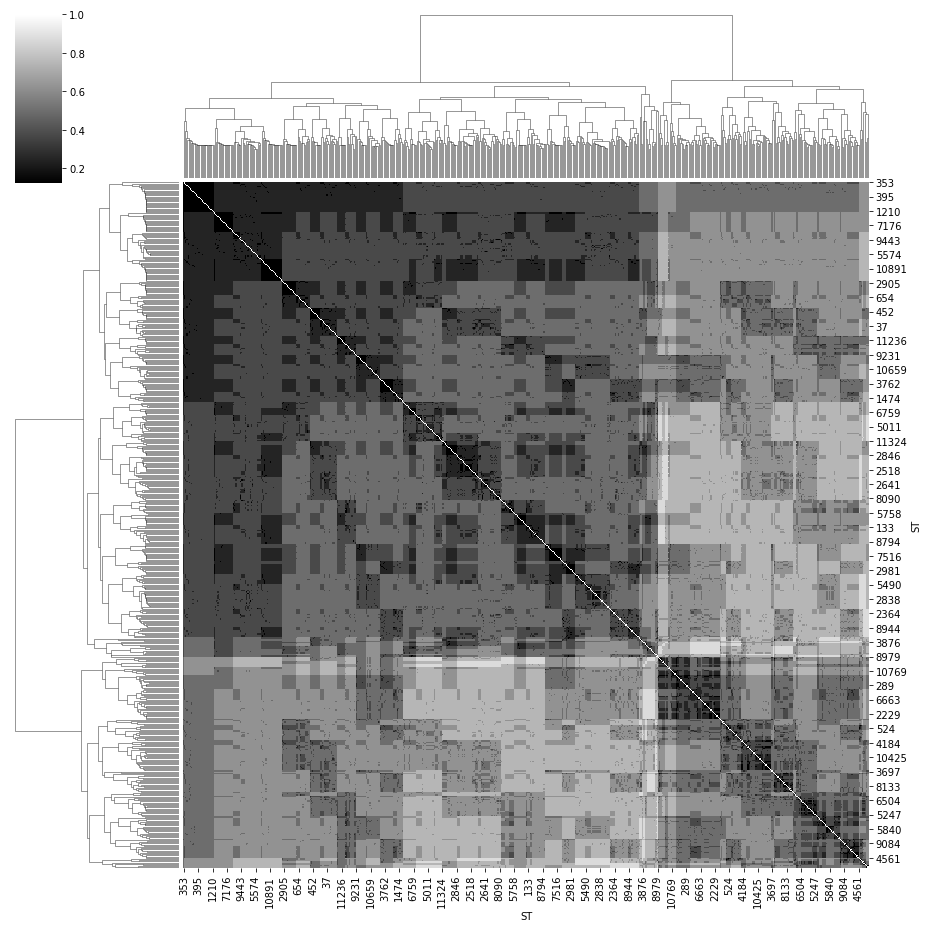

In [24]:
correlations = df.T.corr(method=hamming)
correlations_array = np.asarray(correlations)

linkageMatrix = linkage(
    distance.pdist(correlations_array), method='average')

clusters = fcluster(linkageMatrix, t=3, criterion='maxclust', depth=2, R=None, monocrit=None)

sns.clustermap(correlations, row_linkage=linkageMatrix, method="average",
            figsize=(13, 13), cmap='binary_r')

df['cluster'] = clusters

In [7]:
df.to_excel(f'CC{cc}_clusters_ST.xlsx')

In [6]:
df

,aspA,glnA,gltA,glyA,pgm,tkt,uncA,cluster
ST,,,,,,,,
5,7,2,5,2,10,3,6,1
12,7,1,5,2,11,3,6,1
26,14,18,5,2,11,3,6,1
37,7,17,2,2,18,3,6,1
82,7,1,2,2,4,3,6,1
...,...,...,...,...,...,...,...,...
11571,7,2,2,2,2,3,6,1
11591,7,227,5,68,10,3,1,1
11714,2,17,512,2,22,3,6,2
